In [79]:
# Importing all the necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import TomekLinks

In [80]:
# For reading data
heart_dataset = pd.read_csv("../dataset/heart.csv") # ..->current directory

In [81]:
# Check the data
heart_dataset.head() # first 5 rows

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [82]:
# Size of the dataset
heart_dataset.shape

(303, 14)

In [83]:
# Statistical summary
heart_dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<Figure size 1200x1000 with 0 Axes>

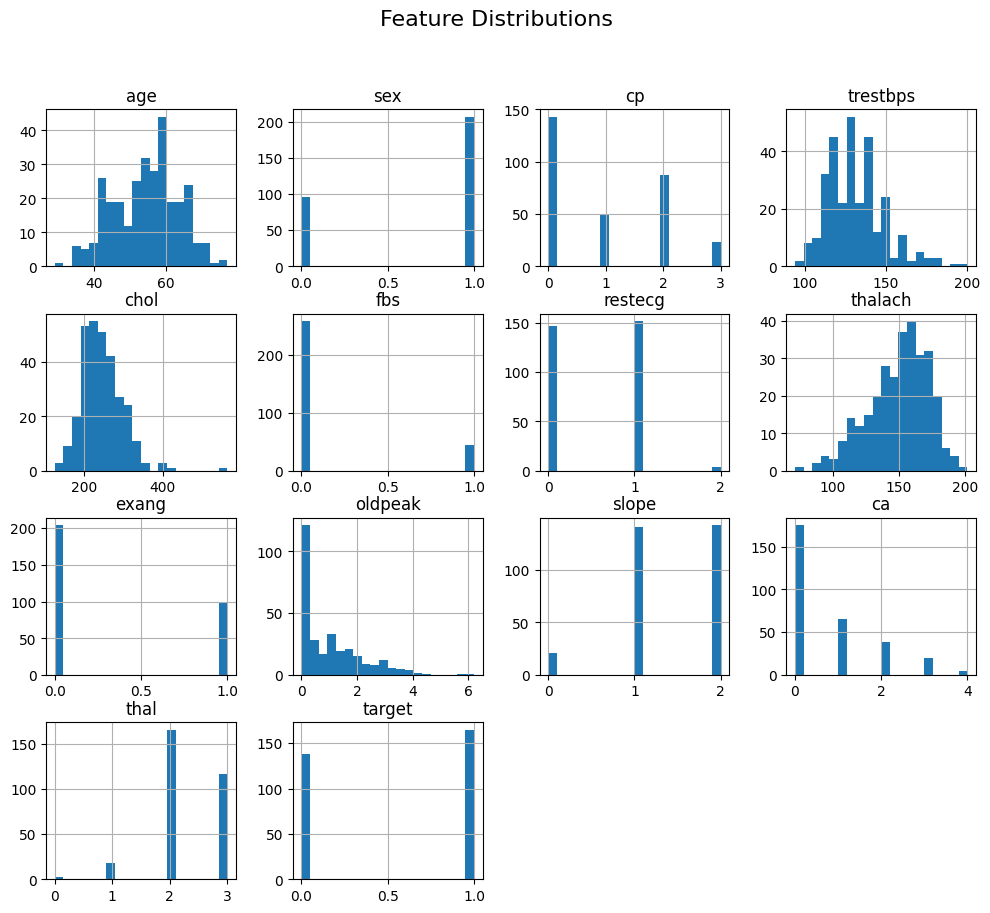

In [84]:
plt.figure(figsize=(12, 10))
heart_dataset.hist(figsize=(12, 10), bins=20)
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

In [85]:
heart_dataset.reset_index(drop=True, inplace=True)

In [86]:
# Compute the correlation matrix
correlation_matrix = heart_dataset.corr()

# Check for NaN values in the correlation matrix
print(correlation_matrix.isna().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [87]:
print(heart_dataset.nunique())

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64


In [88]:
print(heart_dataset.corr())

               age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.098447 -0.068653  0.279351  0.213678  0.121308   
sex      -0.098447  1.000000 -0.049353 -0.056769 -0.197912  0.045032   
cp       -0.068653 -0.049353  1.000000  0.047608 -0.076904  0.094444   
trestbps  0.279351 -0.056769  0.047608  1.000000  0.123174  0.177531   
chol      0.213678 -0.197912 -0.076904  0.123174  1.000000  0.013294   
fbs       0.121308  0.045032  0.094444  0.177531  0.013294  1.000000   
restecg  -0.116211 -0.058196  0.044421 -0.114103 -0.151040 -0.084189   
thalach  -0.398522 -0.044020  0.295762 -0.046698 -0.009940 -0.008567   
exang     0.096801  0.141664 -0.394280  0.067616  0.067023  0.025665   
oldpeak   0.210013  0.096093 -0.149230  0.193216  0.053952  0.005747   
slope    -0.168814 -0.030711  0.119717 -0.121475 -0.004038 -0.059894   
ca        0.276326  0.118261 -0.181053  0.101389  0.070511  0.137979   
thal      0.068001  0.210041 -0.161736  0.062210  0.098803 -0.03

In [89]:
print(heart_dataset.dtypes)

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


In [90]:
# Get correlation with target variable
target_column = "target"  # Ensure this is the correct target column
correlations = heart_dataset.corr()[target_column].sort_values(ascending=False)
print(correlations)

target      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64


In [91]:
# Unique count for heart and non-diabetic patients
heart_dataset['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [92]:
heart_dataset.groupby('target').mean() # Groups the data according to column and displays ean of them

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


In [93]:
X = heart_dataset.drop(columns=['target'],axis=1)
y = heart_dataset['target']

In [94]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [95]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [96]:
X_train.shape

(242, 13)

In [97]:
X_test.shape

(61, 13)

In [98]:
y_train.shape

(242,)

In [99]:
y_test.shape

(61,)

In [100]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3


In [101]:
model = svm.SVC(kernel='linear', random_state=42)

In [102]:
model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [103]:
y_pred = model.predict(X_test)

In [104]:
print(accuracy_score(y_test, y_pred))

0.8688524590163934


In [105]:
print(f"Confusion Matrix - {model}")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix - SVC(kernel='linear', random_state=42)
[[25  4]
 [ 4 28]]


In [106]:
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))

0.875
0.875


In [107]:
model_2 = DecisionTreeClassifier(random_state=42)

In [108]:
model_2.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [109]:
y_pred_2 = model_2.predict(X_test)

In [110]:
print(accuracy_score(y_test, y_pred_2))

0.7540983606557377


In [111]:
print(f"Confusion Matrix - {model_2}")
print(confusion_matrix(y_test, y_pred_2))

Confusion Matrix - DecisionTreeClassifier(random_state=42)
[[25  4]
 [11 21]]


In [112]:
print(precision_score(y_test, y_pred_2))
print(recall_score(y_test, y_pred_2))

0.84
0.65625


In [113]:
model_3 = LogisticRegression(C=1.0, solver='liblinear')

In [114]:
model_3.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [115]:
y_pred_3 = model_3.predict(X_test)

In [116]:
# Accuracy
print(accuracy_score(y_test, y_pred_3))

0.8688524590163934


In [117]:
print(f"Confusion Matrix - {model_3}")
print(confusion_matrix(y_test, y_pred_3))

Confusion Matrix - LogisticRegression(solver='liblinear')
[[25  4]
 [ 4 28]]


In [118]:
print(precision_score(y_test, y_pred_3))
print(recall_score(y_test, y_pred_3))

0.875
0.875


In [119]:
model_4 = RandomForestClassifier(n_estimators=100, random_state=42)

In [120]:
model_4.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [121]:
y_pred_4 = model_4.predict(X_test)

In [122]:
# Accuracy
print(accuracy_score(y_test, y_pred_4))

0.8360655737704918


In [123]:
print(f"Confusion Matrix - {model_4}")
print(confusion_matrix(y_test, y_pred_4))

Confusion Matrix - RandomForestClassifier(random_state=42)
[[24  5]
 [ 5 27]]


In [124]:
print(precision_score(y_test, y_pred_4))
print(recall_score(y_test, y_pred_4))

0.84375
0.84375


In [125]:
import pickle
filename = 'heart_model.sav'
pickle.dump(model, open(filename, 'wb'))